### Imports

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore', category=UserWarning)

### Importing dataset as Pandas DataFrame

In [36]:
# data from: https://www.kaggle.com/datasets/aliabedimadiseh/taxol-drug-resistance-cell-lines-in-breast-cancer/data
df = pd.read_csv('../Desktop/drug_resistant_dataset.csv')
df = df.rename(columns={'Gene.symbol': 'gene_symbol', 'P.Value': 'pValue', 'Cell Line': 'cell_line'})
df.head()

,gene_symbol,pValue,logFC,cell_line
0,EDIL3,2.350000e-18,-6.356883,BAS
1,IGFBP7,2.230000e-19,-6.302001,BAS
2,TFPI,3.480000e-17,-5.950269,BAS
3,CLDN1,4.550000e-19,-5.599057,BAS
4,ANKRD1,2.650000e-18,-5.415740,BAS


##### Pvalue: Compared between control and drug resistance cell
##### logFC: Fold change show up or down regulations

### Data Visualization

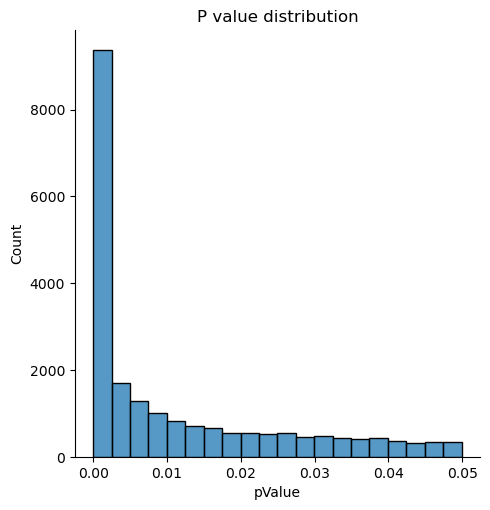

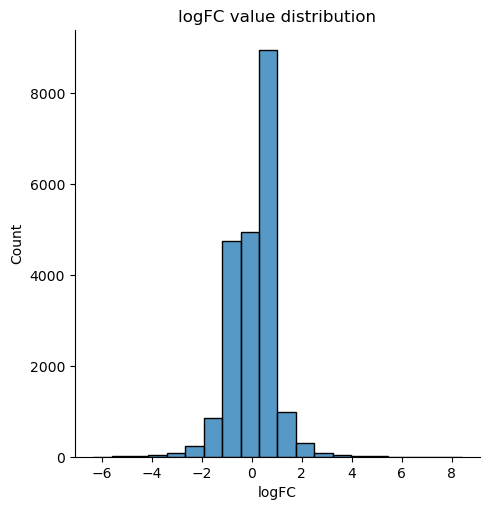

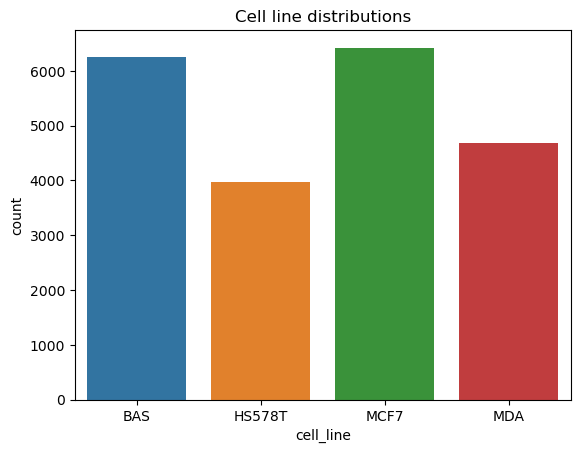

In [37]:
sns.displot(df.pValue, bins=20, kind='hist')
plt.title("P value distribution")
sns.displot(df.logFC, bins=20, kind='hist')
plt.title("logFC value distribution")
plt.show()
sns.countplot(x='cell_line', data=df)
plt.title("Cell line distributions")
plt.show()

### Data clean-up 

In [38]:
enc = OrdinalEncoder() # to replace the gene names with ordinal integers
df[['gene_symbol']] = enc.fit_transform(df[['gene_symbol']])
df.head()

,gene_symbol,pValue,logFC,cell_line
0,3061.0,2.350000e-18,-6.356883,BAS
1,4932.0,2.230000e-19,-6.302001,BAS
2,11118.0,3.480000e-17,-5.950269,BAS
3,2028.0,4.550000e-19,-5.599057,BAS
4,448.0,2.650000e-18,-5.415740,BAS


In [39]:
# check for missing values
df.isnull().values.any()
# no missing values in dataset :) 

False

### Train Test data split

In [55]:
X = df.drop(columns=['cell_line', 'gene_symbol']) #actually the data in gene symbol reduced the accuracy of all classifiers, therefore will be excluded
y = df['cell_line']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=.3)

## Testing different machnie learning models

#### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

#### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=43)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=43)

#### AdaBoost Classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=43)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=43)

#### Model assesment

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
# Logistic Regression
lr_score_train = lr.score(X_train, y_train)
lr_score_test = lr.score(X_test, y_test)

y_predict_lr = lr.predict(X_test)
lr_accurancy = accuracy_score(y_test, y_predict_lr) *100
print(f"Logistic regression has a R^2 score of {lr_score_train} on training data and {lr_score_test} on testing data")
print(f"Accuracy = {lr_accurancy}%")

Logistic regression has a R^2 score of 0.3584260624748626 on training data and 0.36143259305599 on testing data
Accuracy = 36.143259305599%


In [61]:
# Random Forest
f_score_train = forest.score(X_train, y_train)
f_score_test = forest.score(X_test, y_test)

y_predict_f = forest.predict(X_test)
f_accurancy = accuracy_score(y_test, y_predict_f) *100
print(f"The Random Forest Classifier has a R^2 score of {f_score_train} on training data and {f_score_test} on testing data")
print(f"Accuracy = {f_accurancy}%")

The Random Forest Classifier has a R^2 score of 0.6496849443625151 on training data and 0.638880200187676 on testing data
Accuracy = 63.8880200187676%


In [62]:
# AdaBoost Classifier
ada_score_train = ada_clf.score(X_train, y_train)
ada_score_test = ada_clf.score(X_test, y_test)

y_predict_ada = ada_clf.predict(X_test)
ada_accurancy = accuracy_score(y_test, y_predict_ada) *100
print(f"The AdaBoost Classifier has a R^2 score of {ada_score_train} on training data and {ada_score_test} on testing data")
print(f"Accuracy = {ada_accurancy}%")

The AdaBoost Classifier has a R^2 score of 0.5918353666711356 on training data and 0.579136690647482 on testing data
Accuracy = 57.9136690647482%


#### Conclusion: Logistic Regression preformed badly :( , the best model here would be the Random Forest Classifier, therefore hyperparameter tuning will be preferomed to obtain an optimal max_depth value for the trees in the forest

### Hyperparameter Tuning with Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50, 100, 150], 'max_depth' : [5, 6, 7, 8, 9, 10, 11, 12, 13]}
grid = GridSearchCV(forest, parameters)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=5, n_estimators=10,
                                              random_state=43),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'n_estimators': [50, 100, 150]})

In [64]:
print('Best estimator: ', grid.best_estimator_)
print('Best score: ', grid.best_score_)
print('Score on test data: ', grid.score(X_test, y_test))
hyperparameter = pd.DataFrame(grid.cv_results_['params'])
scores = pd.DataFrame(grid.cv_results_['mean_test_score'], columns = ['score'])
df_hyper = pd.concat([hyperparameter, scores], axis = 1)
print(df_hyper)

Best estimator:  RandomForestClassifier(max_depth=12, n_estimators=50, random_state=43)
Best score:  0.7269738527257678
Score on test data:  0.7308414138254614
    max_depth  n_estimators     score
0           5            50  0.613620
1           5           100  0.618714
2           5           150  0.614625
3           6            50  0.668052
4           6           100  0.664231
5           6           150  0.663762
6           7            50  0.688096
7           7           100  0.688230
8           7           150  0.688632
9           8            50  0.702909
10          8           100  0.702507
11          8           150  0.701770
12          9            50  0.713567
13          9           100  0.712093
14          9           150  0.712361
15         10            50  0.720404
16         10           100  0.721209
17         10           150  0.722549
18         11            50  0.725030
19         11           100  0.723622
20         11           150  0.724427
21  

#### the best parameters are: max_depth = 12 and n_estimators = 50

### Implementing the optimal Random Forest Classifier

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df = pd.read_csv('../Desktop/drug_resistant_dataset.csv')
df = df.rename(columns={'Gene.symbol': 'gene_symbol', 'P.Value': 'pValue', 'Cell Line': 'cell_line'})

In [96]:
X = df.drop(columns=['cell_line', 'gene_symbol']) #actually the data in gene symbol reduced the accuracy of all classifiers, therefore will be excluded
y = df['cell_line']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.3)

In [97]:
new_forest = RandomForestClassifier(max_depth=12, n_estimators=150, random_state=43)
new_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=150, random_state=43)

In [98]:
new_f_score_train = new_forest.score(X_train, y_train)
new_f_score_test = new_forest.score(X_test, y_test)

y_predict_new_f = new_forest.predict(X_test)
new_f_accurancy = accuracy_score(y_test, y_predict_new_f) *100
print(f"After hyperparameter tuning the Random Forest Classifier has a R^2 score of {new_f_score_train} on training data and {new_f_score_test} on testing data")
print(f"Accuracy = {new_f_accurancy}%")

After hyperparameter tuning the Random Forest Classifier has a R^2 score of 0.7942083389194262 on training data and 0.7316233969346262 on testing data
Accuracy = 73.16233969346261%


### Final model report

In [100]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test , y_predict_new_f))

              precision    recall  f1-score   support

         BAS       0.63      0.83      0.72      1858
      HS578T       0.64      0.61      0.62      1168
        MCF7       0.94      0.70      0.80      1976
         MDA       0.77      0.75      0.76      1392

    accuracy                           0.73      6394
   macro avg       0.74      0.72      0.72      6394
weighted avg       0.76      0.73      0.73      6394

